<a href="https://colab.research.google.com/github/AnastasiaaAlekseichuk/lab/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Japan'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

Тестовый набор данных

In [7]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
seed(1)
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


Визуальные проверки нормальности

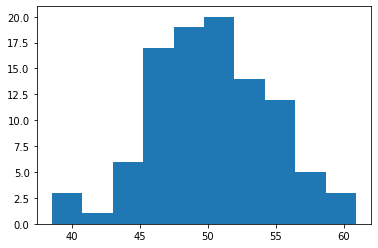

In [9]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
seed(1)
data = 5 * randn(100) + 50
pyplot.hist(data)
pyplot.show()

Тест Шапиро-Вилка

In [10]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
seed(1)
data = 5 * randn(100) + 50
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian  (fail to reject HO')
else:
  print('Sample does not looks Gaussian  (reject HO')

Statistics=0.992, p=0.822
Sample looks Gaussian  (fail to reject HO


Тест д'Агостино на K ^ 2

In [11]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
seed(1)
data = 5 * randn(100) + 50
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('Sample looks Gaussian  (fail to reject HO')
else:
  print('Sample does not looks Gaussian  (reject HO')

Statistics=0.102, p=0.950
Sample looks Gaussian  (fail to reject HO


Тест Андерсона-Дарлинга

In [15]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
seed(1)
data = 5 * randn(100) + 50
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  s1, cv = result.significance_level[i], result.critical_values[i]  
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (s1, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (s1, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject HO)
10.000: 0.632, data looks normal (fail to reject HO)
5.000: 0.759, data looks normal (fail to reject HO)
2.500: 0.885, data looks normal (fail to reject HO)
1.000: 1.053, data looks normal (fail to reject HO)
